<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Transport_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transport Properties
Transport properties describe the evolution of a system property in response to a perturbation of the property. For example, we know from thermodynamics that the lowest chemical potential is obtained whem a system is thoroughly mixed. A non-uniform concentration profile is not at equilibrium. Diffusion is the transport property that describes the response of the system to this non-equilibrium concentration profile. Other transport properties are similar in that they are generally properties *carried* by molecules so diffusion is really the base transport property. Thermal conductivity (molecules transporting energy) and viscoscity (molecules transporting momentum) are just molecules moving like in diffusion while carrying these other various properties as well.

We will here work out the mathematics of diffusion but we'll use symbols that can stand in for other transport properties too.

Let's setup *sympy* to do the symbolic math and a bunch of symbols and variables to use. Some of those we'll use include
  *   $nd$ for number density of molecules ($N_d$)
  *   $V$ for volume
  *   $A$ for Area
  *   $v_{avg}$ for averge speed
  *   $f_v$ for velocity distribution function
  *   $mfp$ for mean free path ($\lambda$)



In [6]:
import sympy as sp
import matplotlib.pyplot as plt
nd,V,A,v_avg,theta,m,T,f_v,mfp=sp.symbols('N_d,V,A,v_avg, theta,m,T,f_v,lambda',nonnegative=True,real=True)# nd=number density of molecules, mfp=mean free path, A=area,f_v=velocity fraction
kb=sp.symbols('k_B',real=True,positive=True,constant=True) #symbol for boltzmann constant
dt=sp.Symbol(r'\Delta t') # getting Delta as a symbol works fine but Delta and another variable as one symbol doesn't always work right so I've found that it works more consistently if I do it on its own and use Symbol rather than symbols.
theta,phi,v,dv=sp.symbols('theta,phi,v,dv',nonnegative=True,real=True)

from scipy.constants import Boltzmann, gas_constant, Avogadro # import values for boltzmann, avogadro, and gas constant
k_b=Boltzmann # variable for boltzmann. Note that the variable is k_b and the symbol is kb (which displays as k(subscript)B)
NA=Avogadro # variable for Avogadro

Set up some formulas for the volume of a slanted cylinder and the number of molecules in that cylinder as a function of molecular density.

In [ ]:
volume=sp.Eq(V,A*v*dt*sp.cos(theta)) # volume of a cylinder at an angle
N_cyl=sp.Eq(V*nd,nd*volume.rhs) # the number of molecules in the cylinder. density*volume
N_cyl #number in cylinder

#Fick's First Law
We are going to focus our attention on molecules moving through an area, A, in a given time (molecules/m$^2$/s). This is a quantity that is given the name *flux*.

To begin, imagine in a plane a circular area, A, that is one end of a cylinder of length $\left<v\right>\Delta t$. The cylinder can be at any angle to the plane.



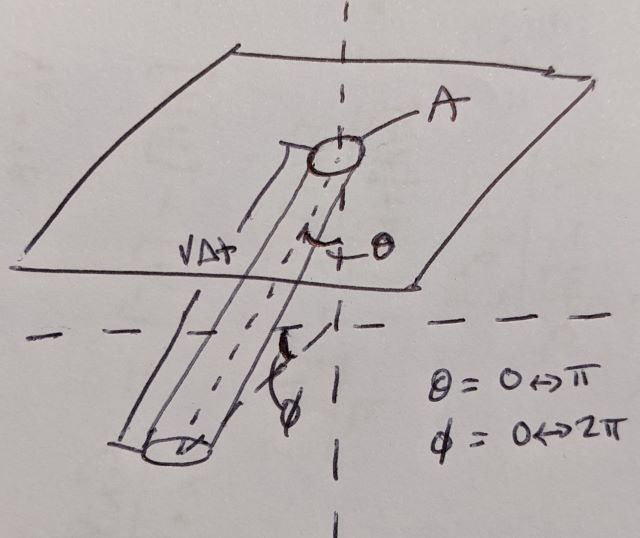

We need to develop a function to determine calculate the rate of molecules passing through a given area as a function of direction and speed. Here we can begin with the Maxwell-Boltzmann distribution in spherical polar coordinates but, since we're going to want to limit the available trajectories of the molecules, we won't integrate over all possible angles. The factor of $4\pi v^2$ will be left unintegrated as $sin\theta d\theta d\phi v^2 dv$. Integration of this over $\theta$ from 0 to $\pi$ and $\phi$ from 0 to 2$\pi$ will give us back our $4\pi v^2dv$.

So our Maxwell-Boltzmann distribution of speeds and directions then is

In [ ]:
mb3d=sp.Eq(f_v,sp.sqrt(m/(2*sp.pi*kb*T))**3*sp.exp(-m*v**2/(2*kb*T))*v**2*sp.sin(theta))
mb3d

Now we should be able to integrate this over all $\phi$ but only allow $\theta$ to range from 0 to $\frac{\pi}{2}$ in order to only count molecule moving through $A$ from the bottom of the plane. Let's see what this gives...

In [ ]:
frac1=sp.integrate(sp.integrate(sp.integrate(mb3d.rhs,(phi,0,2*sp.pi)),(theta,0,sp.pi/2)),(v,0,sp.oo))
frac1.subs({kb:k_b,m:0.040,T:300}).evalf()

Is this result reasonable?

If we multiply this version of the Maxwell-Boltzmann distribution by the number of molecules in our cylinder, $N_{cyl}$, calculated above, we get an expression that will give us the number of molecules moving with the speed and the direction that we choose.

In [ ]:
Nds=sp.symbols('N_{ds}',nonnegative=True,real=True) # N_ds means N in the (d)irection and with the (s)peed to pass through the area, A.

expr1=sp.Eq(Nds, N_cyl.rhs*mb3d.rhs)
expr1

Now let's simplify a little by adjusting to calculate the number of molecules that pass through area *A* per unit time. This quantity is called *flux* and we give it the symbol [$J_z$](https://en.wikipedia.org/wiki/Jay-Z) for flux in the $z$-direction.

In [ ]:
Jz=sp.symbols('J_z',real=True)
dflux=sp.Eq(Jz,expr1.rhs/A/dt)
dflux

This is effectively a kind of flux distribution function giving the flux in any direction (although it's not normalized and so doesn't give fraction of flux in any direction or something similar).

Now let's integrate over all molecules moving *up* (0<θ<π/2) with any speed and from any $\phi$ (0<ϕ<2π) direction.

In [ ]:
flux=sp.integrate(sp.integrate(sp.integrate(dflux.rhs,(phi,0,2*sp.pi)),(theta,0,sp.pi/2)),(v,0,sp.oo),conds='none')# if we leave off conds='none', we still get the answer but also a second answer.
                                                                                                                  #probably because we didn't completely specify assumptions about some symbol (positive,real,etc)                                                                                                                  #and there's probably a scenario in which the integral can't be evaluated. But that's not true for our case.
flux

If we factor out the average speed expression we obtained from the Maxwell-Boltzmann distribution, $\sqrt{\dfrac{8k_BT}{\pi m}}$, we get $$J_z=\frac{1}{4}N_d\left<v\right>$$ where $N_d$ is the density of molecules.

[We can get sympy to factor out at least some of the average speed (for some reason including the 8 doesn't work. But multiply the result by 2/2 and move  $2\sqrt2$ (which is equivalent to $\sqrt8$) into the square root and we're left with the result above.]

In [ ]:
print(sp.collect(flux,sp.sqrt(kb*T/sp.pi/m),evaluate=False)[sp.sqrt(kb*T/sp.pi/m)])

In [ ]:
exprJz=sp.Eq(Jz,nd*v_avg/4)
exprJz # which gives using sympy what we figured out using our heads several lines above.

Now this is not particularly informative. I doubt that many have a serious interest in calculating flux in terms of speed and density of molecules but it is a step on the way to something more informative.

We will now pull another piece of information useful to understanding transport properties from our understanding of averages and mean free path.

The mean free path was determined to be the average distance a molecule travels between collisions. For transport properties, we are interested in average travel in a particular direction so knowing the mean free path in a particular direction, say along the $z$-axis would be useful. If $\theta$ is the angle from the $z$-axis, the component of vector in the direction of motion with length, $\lambda$, will be $\lambda cos\theta$.

We can use our flux 'distribution' function equation to average this component along the $z$-axis. There is no $v$ or $\phi$ dependence on this quantity. Since the 'distribution' function in not normalized we will need to normalize in order to use this expression to find the average. This can be accomplished by simply dividing by the integral of the distribution function. (If that is not clear, think of how we normalized the Maxwell-Boltzmann distribution. We multiplied by a constant and integrated over the entire range of the variables and set equal to 1. Solving for the constant of normalization means dividing 1 by that integral. So the normalization constant is really just the reciprocal of the integral.) Since the $v$ and $\phi$ integrals in the denominator and numerator will be the same, they cancel out leaving only the $\theta$ integrals. We're going to continue integrating only over $\theta$ of 0 to $\pi$/2 since we're looking for motion in one direction.

From above our expression for the flux is

In [ ]:
dflux

We now integrate $J_z$ multiplied by the quantity to be averaged, $\lambda\cos\theta$, and divide by the integral of $J_z$.

In [ ]:
avgzmfp=sp.Symbol(r'<\lambda_{z}>') # define a symbol for the average mean free path along z
sp.Eq(avgzmfp,sp.integrate(mfp*sp.cos(theta)*dflux.rhs,(theta,0,sp.pi/2))/sp.integrate(dflux.rhs,(theta,0,sp.pi/2)))



So on average, a molecule travels 2/3$\lambda$ along the $z$-axis between collisions. This, of course, can happen in either direction along the $z$-axis even though we only calculated it in the positive direction.

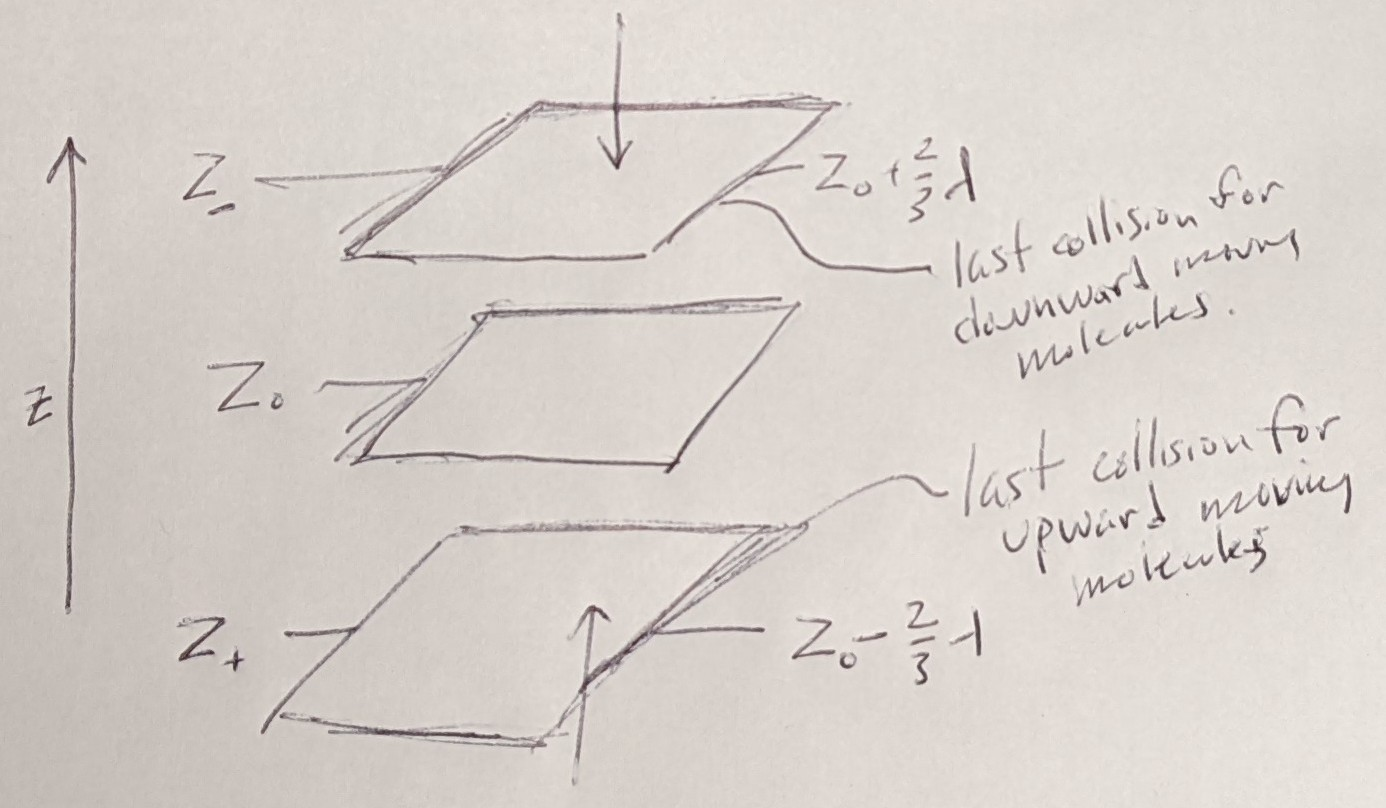

So now we'll calculate the flux of molecules (or of some property $q$ associated with them) along the $z$ axis if the concentration is not uniform. We'll use the symbol, $N_q$ to stand for the number density of property $q$. $q$ can be just the molecules themselves (molecular diffusion), the momentum of molecules (viscosity), the movement of the thermal energy of molecules (thermal conductivity), etc. Transport of all of these can be handled in the same way.

 Imagine that the concentration of molecules (and whatever properties they carry) varies in some way that can be described by a Taylor series. For a concentration 2/3$\lambda$ away from the origin.

 $$N_q(z_0\pm\frac{2}{3}\lambda)=N_q(z_0)\pm\frac{2}{3}\lambda\left(\dfrac{dN_q}{dz}\right)_{z_0}+...$$

 Given this concentration profile, what will be the flux at $z_0$ given that some net number of molecules will enter the $z_0$ slice moving in the negative direction and some will enter from the negative side (moving in the positive direction). The difference between these quantities at $z_0+2/3\lambda$ and $z_0-2/3\lambda$ will give the flux at $z_0$.

In [ ]:
z,J_z=sp.symbols('z,J_z')
Nq=sp.Function('N_q')(z) # Define Nq as a function of z

Jzplus=exprJz.subs(nd,Nq-2*mfp/3*sp.diff(Nq,z)) # moving in the positive direction
Jzminus=exprJz.subs(nd,Nq+2*mfp/3*sp.diff(Nq,z)) # moving in the negative direction

Jayz=Jzplus.rhs-Jzminus.rhs
display(sp.Eq(J_z,Jayz))
sp.Eq(J_z,Jayz.simplify())

For a given molecule at a given temperature, the net flux is equal to a constant multiplied by the change in the concentration with position or $$J_z=-D\left(\dfrac{dN_q}{dz}\right)$$ where D is the diffusion coefficient and the derivative is the concentration gradient. Flux is zero when there is no difference in concentration. Given a non-zero concentration gradient, flux occurs in the direction opposite the gradient. This relation is Fick's First [Law of Diffusion](https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion).

As mentioned earlier, this works for diffusion of molecules or for properties carried by those molecules. In the base case, $N_q$ is just the number density of molecules. But we could modify it to be the density of energy carried by the molecules and we would be considering thermal conductivity instead.

# Fick's Second Law of Diffusion
Even though, Fick's first law is reasonable and clear once you understand, it's doubtful that you've ever had reason to ask what the flux was for a system in terms of the concentration gradient. What might be closer to relevance to more people would be if we could determine the concentration of a system at a point as a function of time.

Consider a slab of a gas $dz$ thick and area $A$ on a side. Molecules are moving opposite a concentration gradient in the $z$ direction as indicated by Fick's first law.

We set up and find the flux at $z_0$


In [ ]:
Jz=sp.symbols('J_z',real=True)
D,t=sp.symbols('D,t',positive=True,real=True)
dz=sp.symbols('dz',nonnegative=True,real=True)
DJz=sp.Symbol(r'd J_z')
Jzdz=sp.Symbol(r'J_{z+ dz}')

Fick1=sp.Eq(Jz,-D*sp.diff(Nq,z))
Fick1

And we can also find the flux at a short distance away from $z_0$. We'll again use a Taylor series to approximate our concentration gradient, this time just using $dz$ for the change in $z$ rather than $2/3\lambda$. So we have $$N_q(z_0+ dz)=N_q(z_0)+ dz\left(\dfrac{dN_q}{dz}\right)_{z_0}+...$$ Substitute into $J_{z+dz}$ and get

In [ ]:
Fick1dz=sp.Eq(Jzdz,Fick1.rhs.subs(Nq,Nq+dz*sp.diff(Nq,z)))
Fick1dz

Now we have flux at $z_0$ and $z_0 + dz$. If we take the difference, we'll have the change in flux or the difference between the molecules entering our slab and those leaving it. This difference will be related to the net change in the number of molecules in our slab. Flux is molecules/area/time. It might be conceptually easier to multiply the flux by area to get molecules/time. That way the difference between $AJ_z$ and $AJ_{z+dz}$ is the change of molecules in our slab per second.

In [ ]:
Fick2a=sp.Eq(A*DJz,A*(Fick1.rhs-Fick1dz.rhs))
Fick2a

Combining and simplifying terms we get

In [ ]:
Fick2a.simplify()

So if $A\,dJ_z$ is the number of molecules entering the slab per second and, if $Adz$ is the volume of the slab, dividing $A\,dJ_z$ by $Adz$ will give molecules per volume per second or $\frac{dN_q}{dt}$

In [ ]:
Nq=sp.Function('N_q')(z,t)
Fick2b=sp.Eq(sp.diff(Nq,t),Fick2a.rhs/(dz*A))
Fick2b.simplify()

This is Fick's second law. It connects changes in concentration to changes in position and time. From it we can get the concentration as a function of position and time if we can solve it for the particular initial conditions of interest.

## A solution
A solution for the case of an initial concentration $N_{z_0}$ in molecules/area all at $z_0$ at the initial time with diffusion ocurring in only the positive $z$ direction is

In [ ]:
Nz0=sp.symbols('N_{z_0}')
Fick2=sp.Eq(Nq,Nz0/(sp.sqrt(sp.pi*D*t))*sp.exp(-z**2/(4*D*t)))
Fick2

# Plotting the solutions

In [51]:
from numpy import linspace
fick2nd=sp.lambdify([z,t,D],Fick2.rhs.subs(Nz0,.1).evalf()) # make the sympy expression into a normal function that we can plot outside sympy. Assign initial conc=.1M.
zz=linspace(0,1,1000) # define the z variable for plotting
conc20=fick2nd(zz,20,.00001) # define a function for concentration as a function of z for specfic values of t and D. We can do this in our plot command instead.

Plot at 20 s, 100 s, 500 s, and 2500 s for $D=10^{-5}$ and $N_{z_0}=0.1$ M. (Here we have taken the liberty to turn $N_{z_0}$ into a molar concentration instead of a molecular concentration. Since $N_{z_0}$ only occurs in the collection of constants out front of the solution, that'll just change the scaling factor of the function. We're, therefore, free to use whatever concentration units we want.)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(zz,conc20)
plt.xlim(0,1)
plt.xlabel('position')
plt.ylabel('conc (M)')
plt.plot(zz,fick2nd(zz,100,.00001))
plt.plot(zz,fick2nd(zz,500,.00001))
plt.plot(zz,fick2nd(zz,2500,.00001))
plt.show()

**Modify the graphs using a bigger or smaller $D$.**

While these curves bear similarity to some of our Maxwell-Boltzmann plots, we did not normalize the function and there's no need. However, in order to use these curves to find such things as the averge distance of diffusion, we would need to normalize them. If the solution to Fick's second law is producing concentration, then dividing this concentration by the total initial concentration $N_{z_0}$ will give us a normalized function. **Try it with the `Fick2` expression above and check that it's integrated.**

In [ ]:
sp.integrate(Fick2.rhs/Nz0,(z,0,sp.oo)) # Normalize by dividing by the total initial concentration

To find the average, then, we can do just as we did for the average speed in the Maxwell-Boltzmann distribution.

**Find $\left<z\right>$**

**Find $\left<z^2\right>$**

The solution to Fick's law will change for changing conditions. For instance, if the molecules at $z=0$ are allowed to diffuse both directions, the main thing that changes is the normalization factor.

In [ ]:
Nz0=sp.symbols('N_{z_0}')
Fick3=sp.Eq(Nq,Nz0/(2*sp.sqrt(sp.pi*D*t))*sp.exp(-z**2/(4*D*t)))
Fick3

In [ ]:
zz=linspace(-1,1,5000)
fick2ndagain=sp.lambdify([z,t,D],Fick3.rhs.subs(Nz0,.1).evalf()) # make the sympy expression into a normal function that we can plot outside sympy. Assign initial conc=.1M.

plt.xlim(-1,1)
plt.xlabel('position')
plt.ylabel('conc (M)')
plt.plot(zz,fick2ndagain(zz,20,.00001))
plt.plot(zz,fick2ndagain(zz,100,.00001))
plt.plot(zz,fick2ndagain(zz,500,.00001))
plt.plot(zz,fick2ndagain(zz,2500,.00001))
plt.show()

Dividing by $N_{z_0}$ should give us probability. Determine if this function is properly normalized.

Determine an expression for the average distance of diffusion and the root mean square distance.

# Random Walk



We have looked at diffusion from the point of view of average behavior of molecules. Now let's take a look at it from the perspective of individual molecules. We'll simplify this by looking at motion along one-axis with each movment being one full step in either the forward or backward direction. The choice of each step is random, it could be either direction. Let's calculate the number of ways of arriving at a position after a given number of total steps, $\Delta$.

First let's set up some symbols.

In [ ]:
from sympy import factorial, log, symbols
W=symbols('W',positive=True) # Define a symbol for the number of ways.
Del,Delp,Delm,P=sp.symbols(r'\Delta,\Delta_+,\Delta_-,P',nonnegative=T) # and for the number of steps total, in the plus direction, and in the minus direction.


We've likely seen before that the number of ways of arranging $N$ molecules in any of three energy levels is $$W=\dfrac{N!}{n_1!n_2!n_3!}$$ Here we have $\Delta$ steps with $\Delta_+$ of them in the positive direction and $\Delta_-$ of them in the negative direction.

In [ ]:
ways=sp.Eq(W,factorial(Del)/factorial(Delp)/factorial(Delm))
ways

Eq(W, factorial(\Delta)/(factorial(\Delta_+)*factorial(\Delta_-)))

Now, this gives the number of ways to end up at some final position relative to the starting point. At each point there is a binary decision to go one way or the other. This means the total number of possible paths is $2^\Delta$. To test this, you might think how many potential paths there are after one step (2) or after two steps (4), etc. To turn W from a number of ways into a probability, then, we should divide W (the number of ways to get to *a particular* step) by $2^\Delta$ (the number of total ways to get *anywhere* that is possible).

In [ ]:
Prob=sp.Eq(P,factorial(Del)/factorial(Delp)/factorial(Delm)/2**Del)
Prob


Eq(P, factorial(\Delta)/(2**\Delta*factorial(\Delta_+)*factorial(\Delta_-)))

Dealing with a complicated fraction involving factorials seems a bit much. Taking a log won't change anything too much and will at least allow us to turn the fraction into addition/subtraction, instead.

In [ ]:
lnP=sp.Eq(log(Prob.lhs),log(Prob.rhs))
display(lnP)
lnP=sp.expand_log(lnP,force=True)
lnP

Eq(log(P), log(factorial(\Delta)/(2**\Delta*factorial(\Delta_+)*factorial(\Delta_-))))

Eq(log(P), -\Delta*log(2) + log(factorial(\Delta)) - log(factorial(\Delta_+)) - log(factorial(\Delta_-)))

We can get rid of the factorials using Stirling's approximation $$lnN!=NlnN-N$$ which works well for large $N$. Avogadro's number is surely large enough (as is, say, 100 for most purposes). Let's substitute for each of the factorials.

In [ ]:
lnP1=sp.expand_log(lnP.subs({log(factorial(Del)):Del*log(Del)-Del,log(factorial(Delp)):Delp*log(Delp)-Delp,log(factorial(Delm)):Delm*log(Delm)-Delm}),force=True)
lnP1

Eq(log(P), \Delta*log(\Delta) - \Delta - \Delta*log(2) - \Delta_+*log(\Delta_+) + \Delta_+ - \Delta_-*log(\Delta_-) + \Delta_-)

Of course the total steps are related to the steps in the plus and minus direction so we don't really need three variables to describe the situation. We'll substitute to get rid of $\Delta_-$.

In [ ]:
lnP1=lnP1.subs({Delm:(Del-Delp)})
lnP1

Eq(log(P), \Delta*log(\Delta) - \Delta*log(2) - \Delta_+*log(\Delta_+) - (\Delta - \Delta_+)*log(\Delta - \Delta_+))

To find the most likely number of steps in the positive direction, let's maximize log(P) by taking the derivative and setting it equal to zero.

In [ ]:
dlnP=sp.Eq(sp.diff(lnP1.rhs,Delp),0)
dlnP

Eq(-log(\Delta_+) + log(\Delta - \Delta_+), 0)

In [ ]:
dlnP1=dlnP.simplify()
dlnP1

Eq(log(\Delta_+) - log(\Delta - \Delta_+), 0)

Note that here the simplification found it useful to change the sign of the terms. The equality is still valid but the result is no longer just the derivative of the $lnP$ but the negative of the derivative of $lnP$.

Set the derivative with respect to $\Delta_+$ equal to zero to find the most likely number of steps in the plus direction. We'll call this most likely number of steps $\Delta_+^*$.

In [ ]:
Delpmax=sp.Symbol(r'\Delta_+^*') #symbol to represent the most probable Delta+.
Delmp=sp.Eq(Delpmax,sp.solve(dlnP1,Delp)[0]) #[0] is needed because sp.solve returns a list (in this case, as list with 1 element) and we need to access the element and not the list itself.
Delmp # delta most probable

Eq(\Delta_+^*, \Delta/2)

Surprise, half the total steps are in the positive direction! Actually this seems obvious. What's not so obvious is what the second derivative of the log of probability will be (or maybe why we care; but we do). Let's find it.

In [ ]:
display(sp.diff(dlnP1.lhs,Delp).simplify())

\Delta/(\Delta_+*(\Delta - \Delta_+))

In [ ]:
ddlnP=sp.diff(dlnP.lhs,Delp).subs(Delp,Delmp.rhs)
ddlnP

-4/\Delta

So we then have the first and second derivatives of lnP. If we wanted a series approximation for lnP centered around $\Delta_+$, we happen to have the expressions needed for the first three terms.
$y(x)=y(x_0)+

In [ ]:
Pmp=sp.Function(r'P*')(Delp)
P=sp.Function('P')(Del)
lnPseries=sp.Eq(log(P),log(Pmp)+sp.diff(log(Pmp))*(Delp-Delpmax)+sp.diff(sp.diff(log(Pmp)))/2*(Delp-Delpmax)**2)
lnPseries

Eq(log(P(\Delta)), (\Delta_+ - \Delta_+^*)**2*(Derivative(P*(\Delta_+), (\Delta_+, 2))/(2*P*(\Delta_+)) - Derivative(P*(\Delta_+), \Delta_+)**2/(2*P*(\Delta_+)**2)) + (\Delta_+ - \Delta_+^*)*Derivative(P*(\Delta_+), \Delta_+)/P*(\Delta_+) + log(P*(\Delta_+)))

This version is not as clear as we might like. First the order is backward. The first term is the normal third term of the series with the second derivative. Also the terms with the derivatives of lnP have been partially evaluated whereas it would be convenient to keep them unevaluated since we have determined the derivatives of these terms in the previous cells. However, we can substitute for the derivatives of lnP nevertheless and sympy will figure it out. For instance, the first derivative, $dlnP/d\Delta_+$ is equal to zero at $\Delta_+^*$ since that is the maximum. Substitute this into the previous output.

In [ ]:
lnPseries1=lnPseries.subs(sp.diff(log(Pmp)),0)
lnPseries1

Eq(log(P(\Delta)), (\Delta_+ - \Delta_+^*)**2*Derivative(P*(\Delta_+), (\Delta_+, 2))/(2*P*(\Delta_+)) + log(P*(\Delta_+)))

And we also know the value of the second derivative. Substitute this as well.

In [ ]:
lnPseries2=lnPseries1.subs(sp.diff(sp.diff(Pmp))/Pmp,ddlnP)#ddlnP from a few cells up was equal to -4/Delta
lnPseries2

Eq(log(P(\Delta)), log(P*(\Delta_+)) - 2*(\Delta_+ - \Delta_+^*)**2/\Delta)

In [ ]:
PDel=sp.Eq(sp.exp(lnPseries2.lhs),sp.exp(lnPseries2.rhs))
PDel

Eq(P(\Delta), P*(\Delta_+)*exp(-2*(\Delta_+ - \Delta_+^*)**2/\Delta))

The form of this equation is very reminiscent of the form of the solution to Fick's second law. We can make it more similar with a few substitutions.

Let's define $X$ to be the steps in a positive or negative direction. It is not the coordinate $x$ but is a count of the number of steps but there is a connection to distance if we continue to imagine each step is one mean free path. We'll use that connection in a bit.

In [ ]:
X,x,t,tau=sp.symbols('X,x,t,tau')
steps=sp.Eq(X,Delp-Delm)
steps

Eq(X, \Delta_+ - \Delta_-)

Substitute $\Delta_-$ in terms of $\Delta_+$ and $\Delta$.

In [ ]:
steps.subs(Delm,Del-Delp)

Eq(X, -\Delta + 2*\Delta_+)

Solve for $\Delta_+$

In [ ]:
DelpX=sp.Eq(Delp,sp.solve(steps.subs(Delm,Del-Delp),Delp)[0])
DelpX

Eq(\Delta_+, X/2 + \Delta/2)

So we could substitute this $\Delta_+$ and our known $\Delta_+^*$ in terms of $X$

In [ ]:
PDel1=PDel.subs({Delp-Delpmax:DelpX.rhs-Delmp.rhs})

In [ ]:
PDel2=PDel1.subs(X,x/mfp)
PDel2

In [ ]:
PDel2.rhs.subs(Del,t/tau)

Comparison to the solution to Fick's law will allow us to see the connection between the diffusion coeffient, D, and $\tau$ and $\lambda$. **Write an equation making this connection.**

This equation is the Einstein-Smoluchowski equation. It's significance is that it makes the connection between a macroscopic property, D, and the microscopic behavior of molecules. For reactions in solution, the mean free path is generally comparable to the size of the particles. This means that we can determine the timescale associated with each random walk step.

# Parallel to Terminal Velocity

In [ ]:
t,m = sp.symbols('t,m',nonnegative=True,real=True)
g,f=sp.symbols('g,f',constant=True,positive=True)
v0,vinf=sp.symbols('v_0,v_{inf}',nonnegative=True,real=True)
C1 = sp.Symbol('C1')
v = sp.Function('v')

Imagine we have an object in free fall experiencing resistance due the wind. We can calculate the velocity of the object as a function of time by accounting for the forces involved. The total force is $ma$ according to Newton. This is make up of the force due to gravity, $mg$, and a force in the opposite direction due to the resistance caused by molecules flowing by the object. This force is dependent on the object's velocity since an object that is not moving would experience no resistance but one that is moving fast experiences more. We can write this force as $-f*v$ where $f$ is the frictional coefficient.

So the equation to solve will be $$\begin{align}F=mg-fv=&ma\\=&m\frac{dv}{dt}\end{align}$$ or
$$mg-fv=\frac{dv}{dt}$$
We can solve this differential equation using `sp.dsolve`. In order to do this we need to set up the equation

In [ ]:
equation = sp.dsolve(m*g - f * v(t) - m * sp.diff(v(t)), v(t),ics={v(0):v0})
equation

In [ ]:
equation.subs(g*m,vinf*f)



In [ ]:
equation = equation.subs({v0:0,m:10,g:9.8,f:1})
sp.plot(equation.rhs,(t,0,50),ylabel='v(t)')

Of course we could avoid the need to solve the differential equation if we were only interested in the actual terminal velocity itself. Our force equation can be simplified if we only care about the point at which the driving force (gravity) balances the restraining frictional force. $$mg-fv=0$$

In [ ]:
termv=sp.Eq(m*g-f*v(t),0)
termv

In [ ]:
vterm=sp.symbols('v_{terminal}')
sp.Eq(vterm,sp.solve(termv,v(t))[0])

We have no real interest in terminal velocity here except that the situation is easy to understand and the mathematics is essentially the same as for diffusion.

In diffusion, we have a restraining force for diffusion which is related to a frictional force involving velocity. Our driving force for diffusion is related to the decrease in chemical potential due to molecules moving in the direction of decreased concentration. $$\mu=\mu^0+RTlnC$$
As we move toward lower concentration, $\mu$ will decrease.

$\mu$ is not a force but a potential. Since force is related to potential as $F=-\dfrac{dE_{pot}}{dz}$ we find that the driving force in this case is $$-\dfrac{\mu^0+RTlnC}{dz}=-RT\dfrac{dlnC}{dz}$$ Putting this in an equation with the restraining and total forces gives $$-RT\dfrac{dlnC}{dz}-fv=m\dfrac{dv}{dt}$$
Compared to the terminal velocity calculation, this one looks similar but has two negative terms on the left hand side. The first negative term is not as negative as it looks, however, because with diffusion happening toward in the positive $z$ direction, the concentration gradient would be in the negative $z$ direction.

In any event, if we skip over the arriving at terminal velocity part and just focus on the region where terminal velocity has been acheived, the driving and restraining forces balance so $$-RT\dfrac{dlnC}{dz}=-\dfrac{RT}{C}\dfrac{dC}{dz}=fv$$ Divide by $f$ and multiply by C to get $$-\dfrac{RT}{f}\dfrac{dC}{dz}=Cv$$ Analysis of the units of $Cv$ leads to molec/m$^2$/s which is flux. So $$J_z=-\dfrac{RT}{f}\dfrac{dC}{dz}$$ **Compare this to Fick's first law.**

## Stokes-Einstein Equation
Einstein, in explaining Brownian motion in 1905, studied particles moving against a frictional force and found that the average squared distance travelled in a given time, $t$, was $$\left<x^2\right>=\dfrac{2k_BTt}{f}$$ Stokes showed that, for a sphere travelling through a fluid, the frictional coefficient, $f$, is equal to $6\pi\eta r$ where $r$ is the radius of the sphere and $\eta$ is the viscosity of the fluid. If we take our diffusing molecules as spherical and assume they are much bigger than the solvent molecules, combining with Einstein we find that $$\left<x^2\right>=\dfrac{2k_BTt}{6\pi\eta r}$$ This also applies if solvent molecules solvate the particle and move along with it. This complicates the determination of the meaning of the radius since we would need to know how big the solvation radius is in addition to the actual radius of the molecule.

**Compare the Stokes-Einstein equation to what we already know about the average squared distance travelled to find another expression for the diffusion coefficient.**

Hemoglobin has a diffusion coefficient in water of $D=6.9\times 10^{-11}$ m$^2$ s$^{-1}$. The viscosity of water is $\eta=0.891\times10^{-3}$ kg m$^{-1}$ s$^{-1}$ (which is 0.891 $cP$ or $centipoise$). **Assuming that hemoglobin is approximately spherical, what is its radius?**


Many molecules are approximately spherical. However, if we add ellipsoids to our repertoire, we can expand the applicability of the Einstein relation, $D=\dfrac{k_BT}{f}$, a little further. There are two types of ellipsoids, prolate (American football shaped) and oblate (pancake shaped). Whereas a sphere has one radius, both ellipsoids have two, the longer one called the major semi-axis ($a$) and the shorter one called the minor semi-axis ($b$). The Stokes relation is appropriate for spherical molecules but for prolate ellipsoids the frictional coefficient can be related to the frictional coefficeient for the mythical but equivalent spherical molecule using
$$f=f^∘\dfrac{\sqrt[3]{\frac{b}{a}}\sqrt{\left(\frac{a}{b}\right)^2-1}}{ln\left[\frac{a}{b}+\sqrt{\left(\frac{a}{b}\right)^2-1}\right]} $$ A similar equation exists for oblate ellipsoids. To use this, we first need to calculate $f^∘$ using an approximate molecular volume and extracting from this volume the radius of a sphere of equivalent volume. This can be used to calculate $f$ using the Stokes relation.

##Sedimentation and Centrifugation

So far everything has been relevant for diffusion of the molecules themselves, but since heat, mass, charge, momentum, and other properties we might care about are carried on the molecules, diffusion is not the only transport property we can explore using the techniques above. Small alterations can get us to these other properties as well. Here we'll explore sedimentation.

Sedimentation is actually virtually identical to free fall. A large molecule falls through a fluid, which provides frictional resistance, under the influence of gravity. The difference here is that in addition to frictional force, the dense fluid also provides a significant buoyant force. This force is related to the weight of the fluid that is displaced by the submerged particle. This weight is normally calculated using the density of the fluid, $\rho_1$ and the *partial specific volume*, $\overline{v}_2=\left(\frac{\partial V}{\partial m_2}\right)_{T_1,\rho_1,m_1}$, of the dissolved particle multipied by the accelleration due to gravity.
$$F_{bouyant}=m_2\rho_1 \overline{v}_2g$$
The partial specific volume is the amount that the volume of the solution changes per mass of the solute added. This depends on the size of the solute molecules but also on the extent and type of interaction between solute and solvent (*e.g.* are they more or less attractive than solvent-solvent interactions?). **More to come...**


This buoyant force decreases the gravitational driving force such that the total force

In [ ]:
t,m = sp.symbols('t,m',nonnegative=True,real=True)
g,f=sp.symbols('g,f',constant=True,positive=True)
v0,vinf=sp.symbols('v_0,v_{inf}',nonnegative=True,real=True)
C1 = sp.Symbol('C1')
v = sp.Function('v')
v2=sp.symbols('\overline{v}_2')
d=sp.symbols('rho_2')

Setting this up in a differential equation and solving...


In [ ]:
equation = sp.dsolve(m*g -m*v2*d*g -f * v(t) - m * sp.diff(v(t)), v(t),ics={v(0):v0})
equation